# Task 1 : Titanic Survival Prediction
Author: Dhananjay Pant
Domain: Data Science
Batch: June2024

# Data Collection

In [46]:
import pandas as pd
# Load the dataset
train_data = pd.read_csv('train.csv')

#Display first few rows of dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing


In [47]:
# Check data for missing values
train_data.isnull().sum()

# Filling Missing Values of Age(177), Embarked(2) 
train_data['Age']= train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked']= train_data['Embarked'].fillna(train_data['Embarked'].mode())


# Encode categorical Variables- Sex and Embarked
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'S':0, 'C':1, 'Q':2})


# Drop irrelevant features
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

print(train_data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0


# Exploratory Data Analysis(EDA)


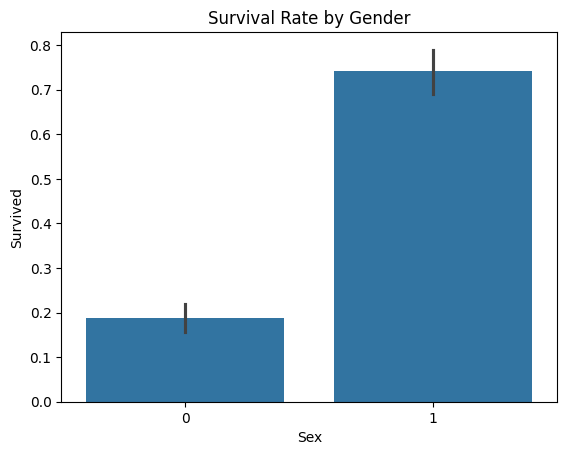

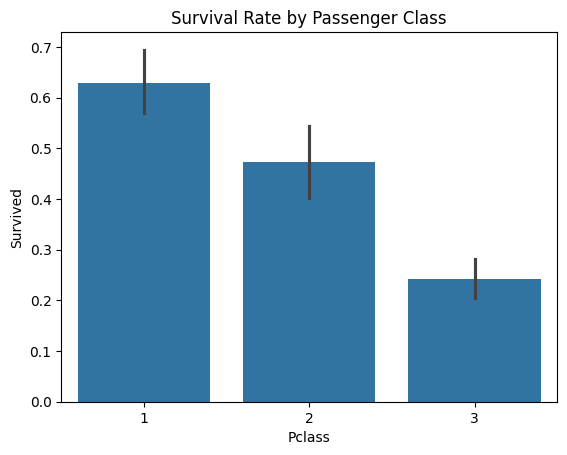

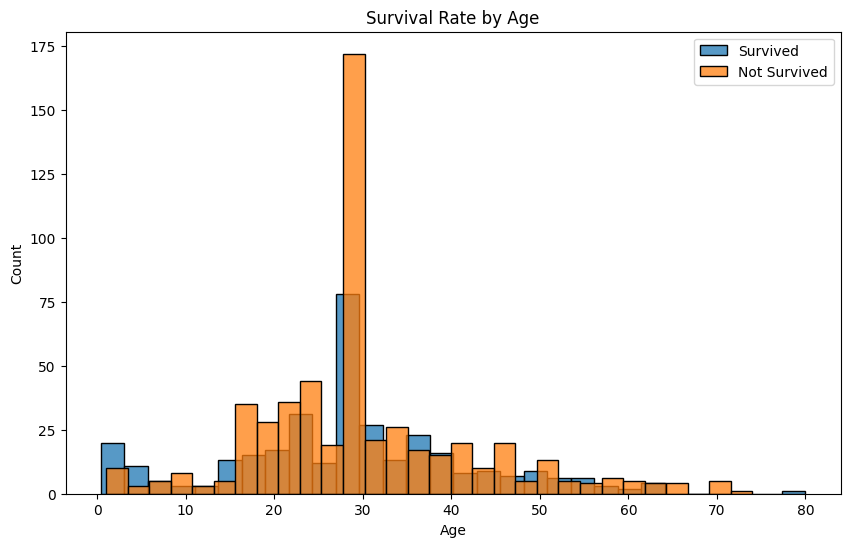

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex',y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger Class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')

# Survival rate by Age
plt.figure(figsize=(10,6))
sns.histplot(train_data['Age'][train_data['Survived'] == 1],bins=30, kde=False, label='Survived')
sns.histplot(train_data['Age'][train_data['Survived'] == 0],bins=30, kde=False, label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

# Model Building


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# Model Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,20]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Best parameters and model evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Accuracy: ',accuracy_score(y_test,y_pred_best))
print(classification_report(y_test,y_pred_best))

Best Accuracy:  0.8044692737430168
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

